In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bit = pd.read_csv('D:/DS Files/DS Assingments/Practice Excel/Bitcoin.csv')

In [3]:
bit.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [4]:
market_cap_raw = bit[['id','market_cap_usd']]

In [5]:
market_cap_raw
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

In [6]:
cap = market_cap_raw.dropna()
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

In [7]:
cap10 = cap.sort_values('market_cap_usd',ascending=False).head(10)

In [8]:
market_cap_usd_sum = cap10['market_cap_usd'].sum()

In [9]:
cap10 = cap10.assign(market_cap_perc=lambda x:(x['market_cap_usd']/market_cap_usd_sum)*100).set_index('id')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'bitcoin'),
  Text(1, 0, 'ethereum'),
  Text(2, 0, 'bitcoin-cash'),
  Text(3, 0, 'iota'),
  Text(4, 0, 'ripple'),
  Text(5, 0, 'dash'),
  Text(6, 0, 'litecoin'),
  Text(7, 0, 'bitcoin-gold'),
  Text(8, 0, 'monero'),
  Text(9, 0, 'cardano')])

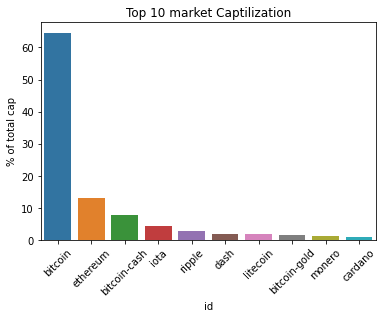

In [10]:
Top_Cap_Title = 'Top 10 market Captilization'
Top_Cap_Ylabel = '% of total cap'

ax = sns.barplot(data = cap10,x=cap10.index,y= 'market_cap_perc')
ax
plt.title(Top_Cap_Title)
plt.ylabel(Top_Cap_Ylabel)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='id'>

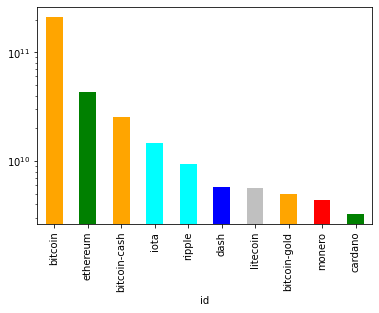

In [11]:
Colors = ['orange','green','orange','cyan','cyan','blue','silver','orange','red','green']
cap10.market_cap_usd.plot.bar(y= 'market_cap_perc',color = Colors,logy=True)